## Train and use an object detection model

### Introduction
ArcGIS provides various ways in which you can complete a deep learning analysis. You can use the geoprocessing tools in ArcGIS Pro or use ArcGIS API for Python to complete the analysis by using code. The method that you choose depends on the analysis environment that you prefer. In this exercise, you will learn how to train a model with geoprocessing tools in ArcGIS Pro to detect swimming pools in a defined area.

> Note: The exercises in this course include View Result links. Click these links to confirm that your results match what is expected.

### **Verify that the deep learning libraries are installed**

To prepare your system for deep learning in ArcGIS Pro, you will verify that the correct deep learning Python libraries are installed. In this step, you will check your ArcGIS Pro installed packages for the deep-learning-essentials library.

1. From the Windows Start menu, expand the ArcGIS folder, and click Python Command Prompt.

2. In the Python Command Prompt window, type conda list and press Enter.

>Note: It may take a few seconds for the list to load. 

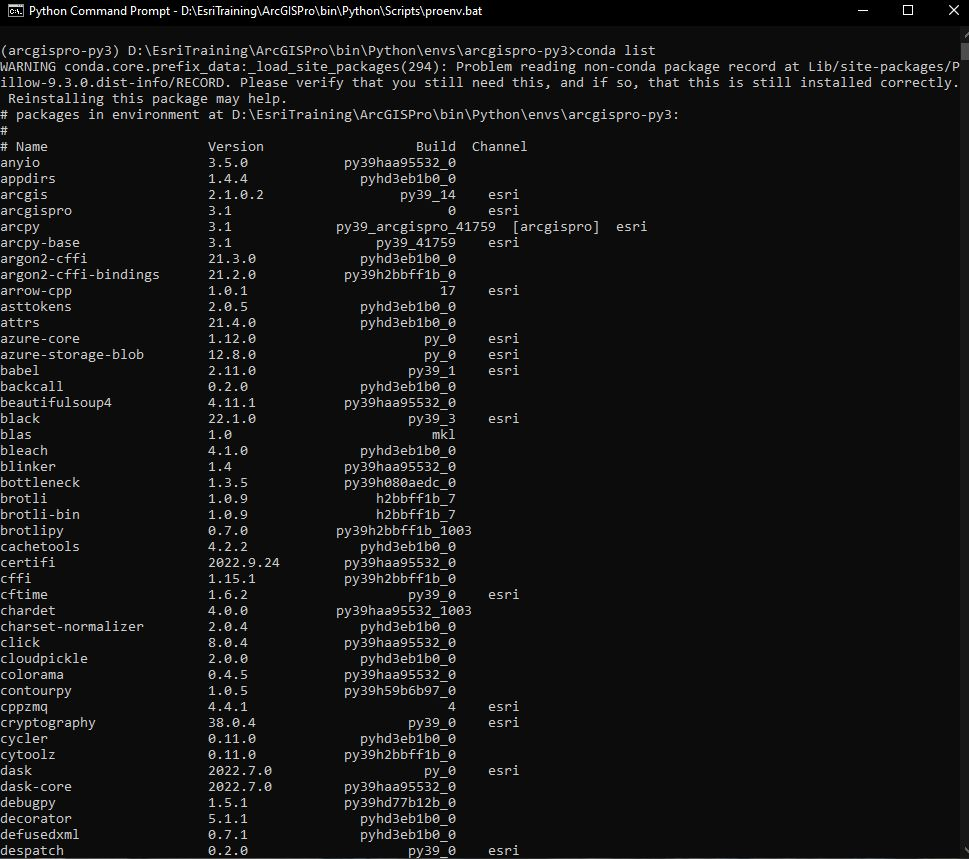

This list shows all your installed packages and libraries in the arcgispro-py3 conda environment. The deep-learning-essentials package is required to run deep learning tools in ArcGIS Pro. The size of the deep learning libraries package is several gigabytes.

3. Scroll down the list and locate the deep-learning-essentials package.

The deep-learning-essentials package needs to match the version of ArcGIS Pro that you have installed to run deep learning tools. In this case, you are using ArcGIS Pro 3.1 and the deep-learning-essentials package version is 3.1.

If the version of your deep-learning-essentials package does not match your current version of ArcGIS Pro, uninstall the old version of the package and then install the newer version. 

> Note: If you do not have the deep-learning-essentials package installed, exit ArcGIS Pro. In a web browser, go to Install deep learning frameworks for ArcGISOpens in new window (https://links.esri.com/InstallDeepLearning). Follow the instructions regarding the Deep Learning Libraries Installer for ArcGIS Pro, and then restart ArcGIS Pro.

4. Close the Python Command Prompt window.

For more information about deep learning, go to ArcGIS Pro Help: Deep learning frequently asked questionsOpens in new window.

In this step, you verified that the required deep-learning-essentials package is installed to complete deep learning workflows in ArcGIS Pro. 

### **Train the model using a geoprocessing tool**

Next, you will train the model by using the Train Deep Learning Model geoprocessing tool in ArcGIS Pro.

> Note: It can take up to four hours to train this model, depending on your computer's processing power. You have been provided the trained model file for this exercise, so you will not run the model.

1. If necessary, start ArcGIS Pro and sign in with your course credentials.

2. Open the ObjectDetection.aprx project. 


3. In the Geoprocessing pane, search for and open the Train Deep Learning Model (Image Analyst Tools) tool.

4. For Input Training Data, browse to and select your C:\EsriTraining\ObjectDetection\ImageChips folder.

5. For Output Model, type PoolsModel_25_SSD.

6. For Max Epochs, type 25.

The number of epochs defines the number of times that the neural network will process the image chips. The default number of 20 is a baseline that you can adjust based on the results of your model.

7. Expand Model Parameters.

For Model Type, choose Single Shot Detector (Object Detection).

The model type will determine the deep learning algorithm and neural network that you will use to train your model. The models that are available to you depend on the metadata format that is chosen for the image chips. You chose a metadata format that is associated with object detection, so only the object detection model types are available. For more information about the other model types, go to ArcGIS Pro Help: [Train Deep Learning Model (Image Analyst)](https://pro.arcgis.com/en/pro-app/tool-reference/image-analyst/train-deep-learning-model.htm).

8. Leave the defaults for the remaining parameters.

Model arguments refer to specific parameter values that are used to train the model. The model arguments will vary based on the model type that you choose. For the Single Shot Detector (Object Detection) model type, you can specify the grid cell size, zoom level, and aspect ratio. These values define how the model examines the image to detect objects. For more information about the Single Shot Detector model, go to ArcGIS API for Python Help: [How single-shot detector (SSD) works](https://developers.arcgis.com/python/guide/how-ssd-works/).

9. To learn more about the individual model parameters, point to Model Arguments and pause on the geoprocessing input information icon Geoprocessing input information.

10. Expand Advanced.

11. Leave the default settings for all fields.

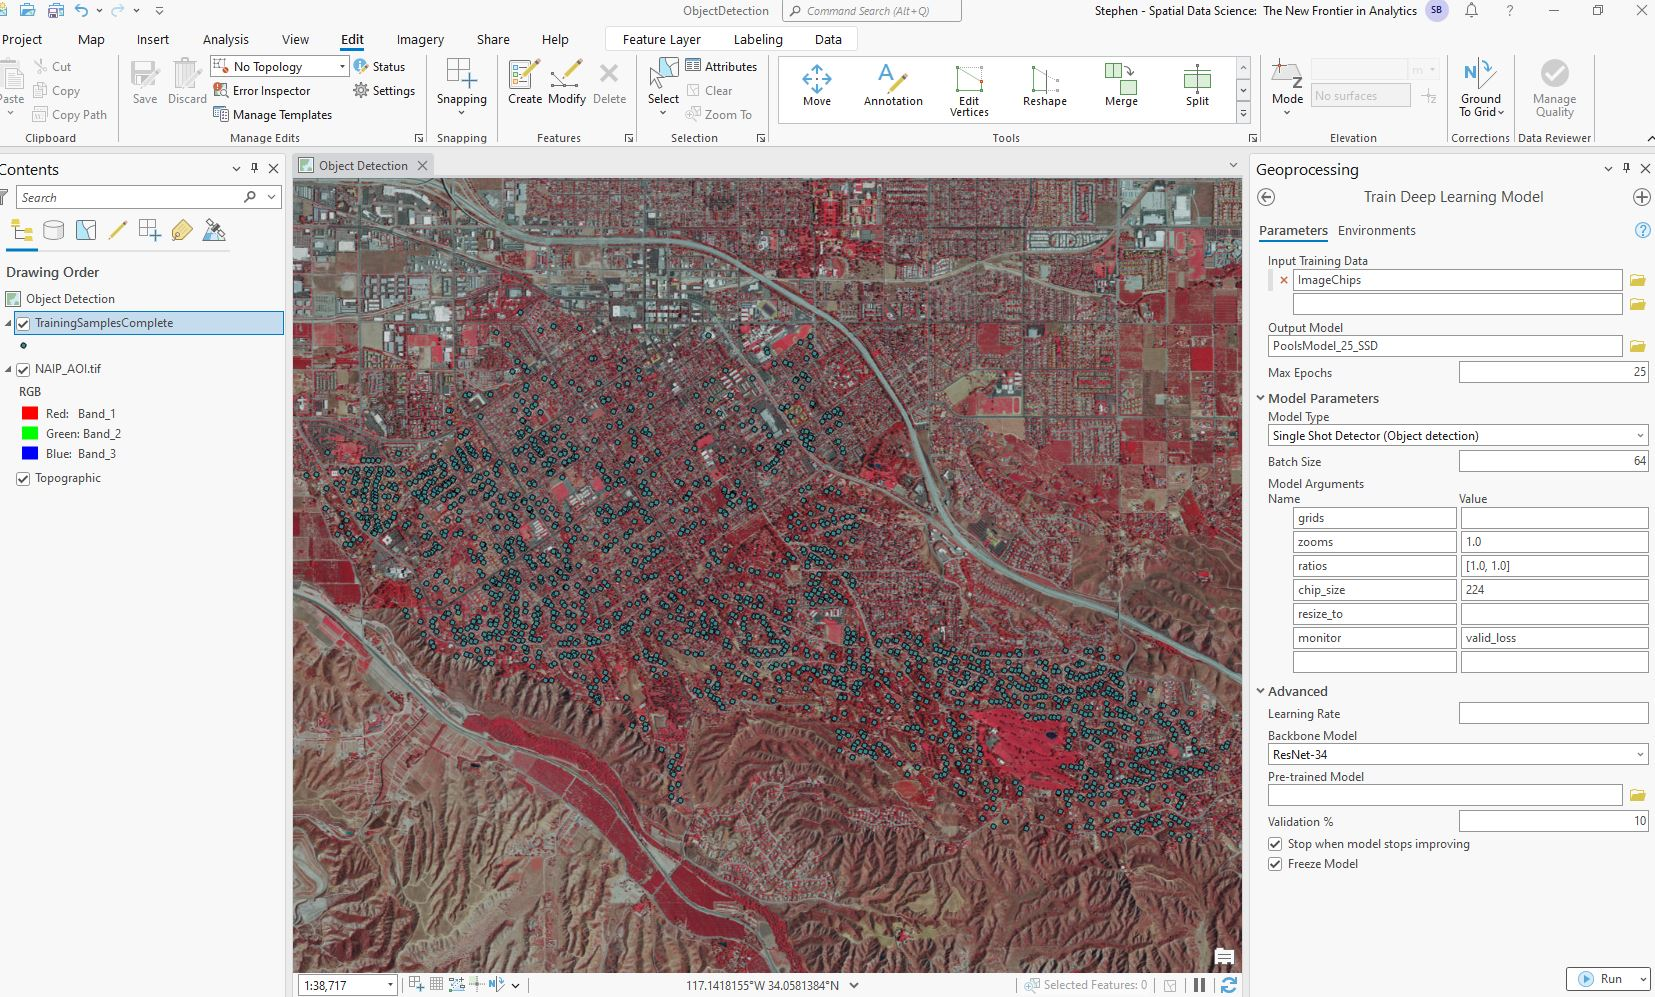

The following graphic is used to explain one of the advanced parameters.

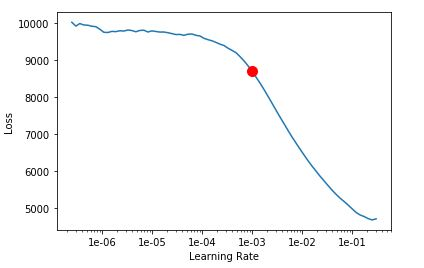

> In this example, the loss (or model error) decreases as the learning rate is increased from 1e-7 to 1e-1. After this point, the loss begins to increase again. The part of the graph between 1e-3 and 1e-1 shows a steeper loss curve and you can choose a learning rate in this range to train the model. By default, the tool chooses a conservative (lower) learning rate (close to 1e-3) to ensure that it does not overshoot the minimum error loss function. However, for faster training, you may pick a higher learning rate (up to 1e-1).

> The learning rate controls the weighting adjustment of the neural network. A low learning rate trains the model slowly, while a high learning rate can jump to conclusions and learn the incorrect information. You can specify a learning rate or leave the default. The default will choose the rate in which loss, or model error, is lowest before it starts to increase again, indicating that the learning rate is too high and is introducing error into the model.

12. To learn more about the other advanced parameters, point to the geoprocessing input information icons .

> Note: It can take up to four hours to train this model, depending on your computer's processing power. You have been provided the trained model file for this exercise, so you will not run the model.

13. After reviewing the parameters, continue to the next step.

### **Review the model**

The Train Deep Learning Model (Image Analyst Tools) tool trains a deep learning model and updates the model definition file (.emd) with this information. You can use this model definition file to detect, or infer, the locations of the remaining swimming pools. By reviewing the results, you can assess the model accuracy to determine whether you should modify the model or proceed with your analysis.

In the remaining exercise steps, you will use the trained model file that was provided for you.

1. Open File Explorer and browse to ..\EsriTraining\ObjectDetection\Results\PoolsModel_25_SSD.

2. Double-click the model_metrics.html file.

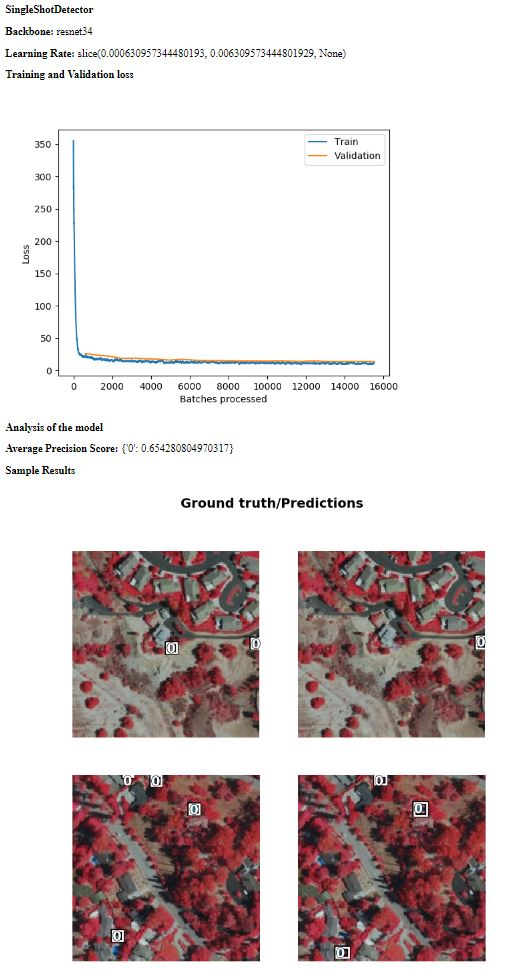

A web browser opens with model metrics that describe the following information:

- `Learning rate` controls the speed at which the model is trained, which shows how quickly the model parameters are updated. In this graphic, the learning rate shows a range of values, where the smaller number on the left is the learning rate applied to the first few layers of the network, and the larger number on the right is applied to the last few layers. The low learning rate trains the first few layers of the network slowly while the higher learning rate trains the final layers of the network more quickly. The end goal is to identify your optimal learning rate. That can be done by finding the highest learning rate where the loss is still improving; since loss is an indicator of error, a smaller number is more ideal.

- `The training and validation loss graph` compares training and validation losses over the training epochs. A model that performs well typically shows a continual decrease in both training and validation loss over the training epochs. If the validation loss begins to increase, then you may have overfitting, where the model is recognizing a particular set of data too closely and therefore may not generalize well to other data.

- `Average precision score` assesses the performance of object detection models. It measures the average precision for the validation set for each class. An average precision score ranges from 0 to 1, where values closer to 1 indicate better model performance.

3. Scroll down to Ground Truth/Predictions.

Comparing the ground truth images with the predicted images will also help you determine the accuracy of your model. This model provides a good baseline, predicting most of the pools identified in the ground truth image.

These metrics can help you determine whether you should modify the parameters of this tool (learning rate, number of epochs, grid cell size, and so on) to improve the results of the models. Because modifications would require more processing time, you will proceed with this model.

4. Close the results and File Explorer, and then return to ArcGIS Pro.

### **Perform inferencing using the model**

After you train the model, you will perform inferencing. Inferencing uses the trained model to extract information from your imagery. In this case, you will extract, or detect, swimming pools for the specified area of interest.

1. In the Geoprocessing pane, click the Back button .

2. Search for and open the Detect Objects Using Deep Learning (Image Analyst Tools) tool.

3. Set the following tool parameters:

- For Input Raster, choose NAIP_AOI.tif.
- For Output Detected Objects, type SwimmingPoolsAll.
- For Model Definition, browse to ..\EsriTraining\ObjectDetection\Results\PoolsModel_25_SSD and select PoolsModel_25_SSD.emd.

You will see some items listed in the Arguments section. These arguments will be used on your image as it passes through the layers of the model. The default arguments use the values that were defined when training the model. You can use these values as a baseline that can be adjusted to refine the inferencing results. The following information provides explanations of each argument.

- `Padding` adds a border of cells around the image. This border is used to ensure that the image maintains its original size as it passes through the model. Padding is most relevant if you are detecting objects that are around the edge of your image.



>The padding in this image is 2 pixels in size, indicated in gray.

- `Threshold` defines the required confidence level for object detection. In this analysis, the threshold is 0.5, meaning that the model has to be at least 50 percent confident that the object is a swimming pool.
- `NMS_Overlap` is the percentage of allowable overlap between features. In this analysis, features that overlap more than 10 percent will be removed.
- `Batch_Size` should be a square number, such as 1, 4, 9, 16, and so on. If the input value is not a perfect square, the analysis will use the largest perfect square that is less than the input. Increasing the batch size can improve tool performance. However, as the batch size increases, more memory is used.
- `Exclude_Pad_Detections` allows you to exclude items in the padded areas. In this analysis, you will exclude the padded areas from inferencing.

4. Check the Non Maximum Suppression box.

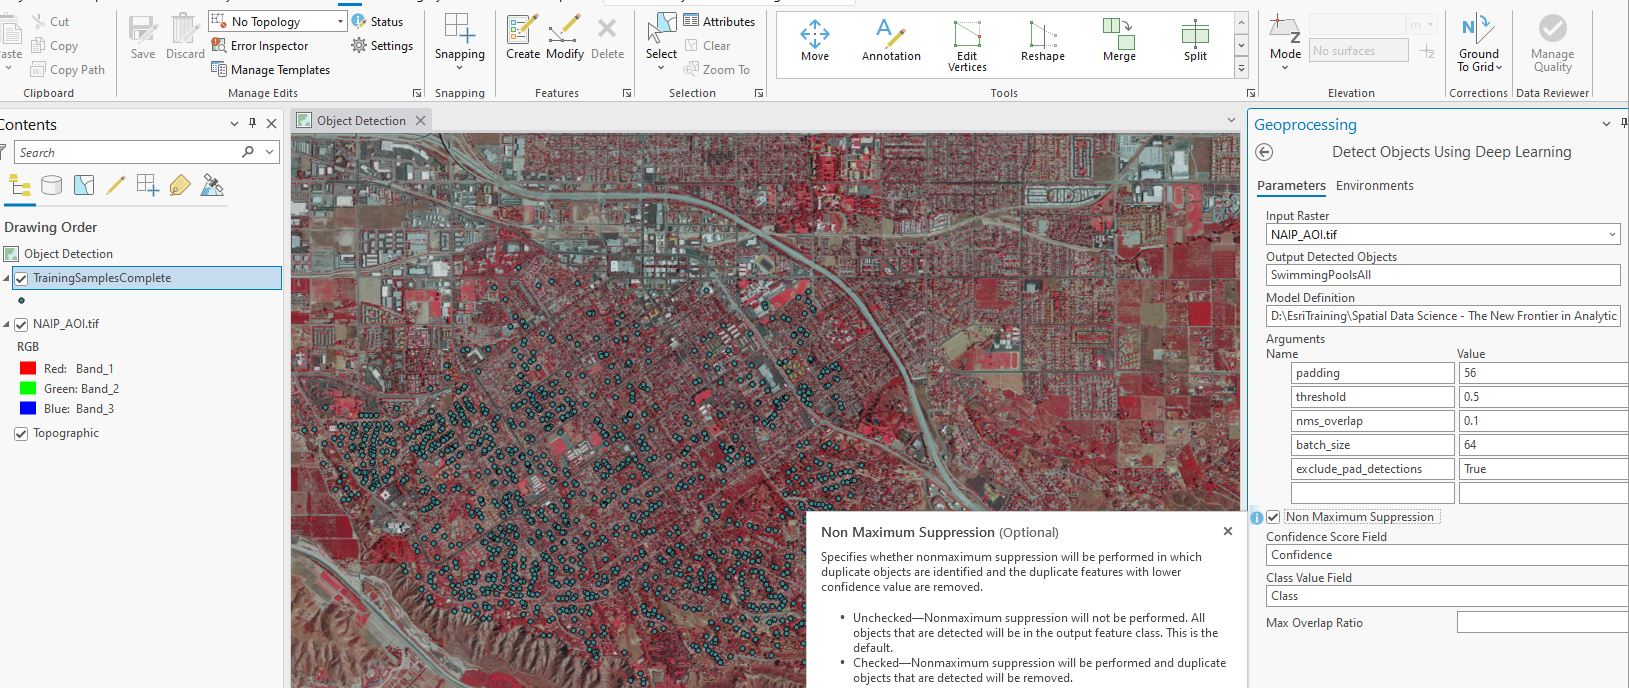

Non Maximum Suppression will identify duplicate features. The feature with the lower confidence level will be removed. The default values for this parameter will use the confidence field to determine which feature has a lower confidence level. Max Overlap Ratio will define how much overlap between features is allowable. The default does not allow any overlap.

5. On the ribbon, from the Map tab, zoom to the Inference Pools bookmark.

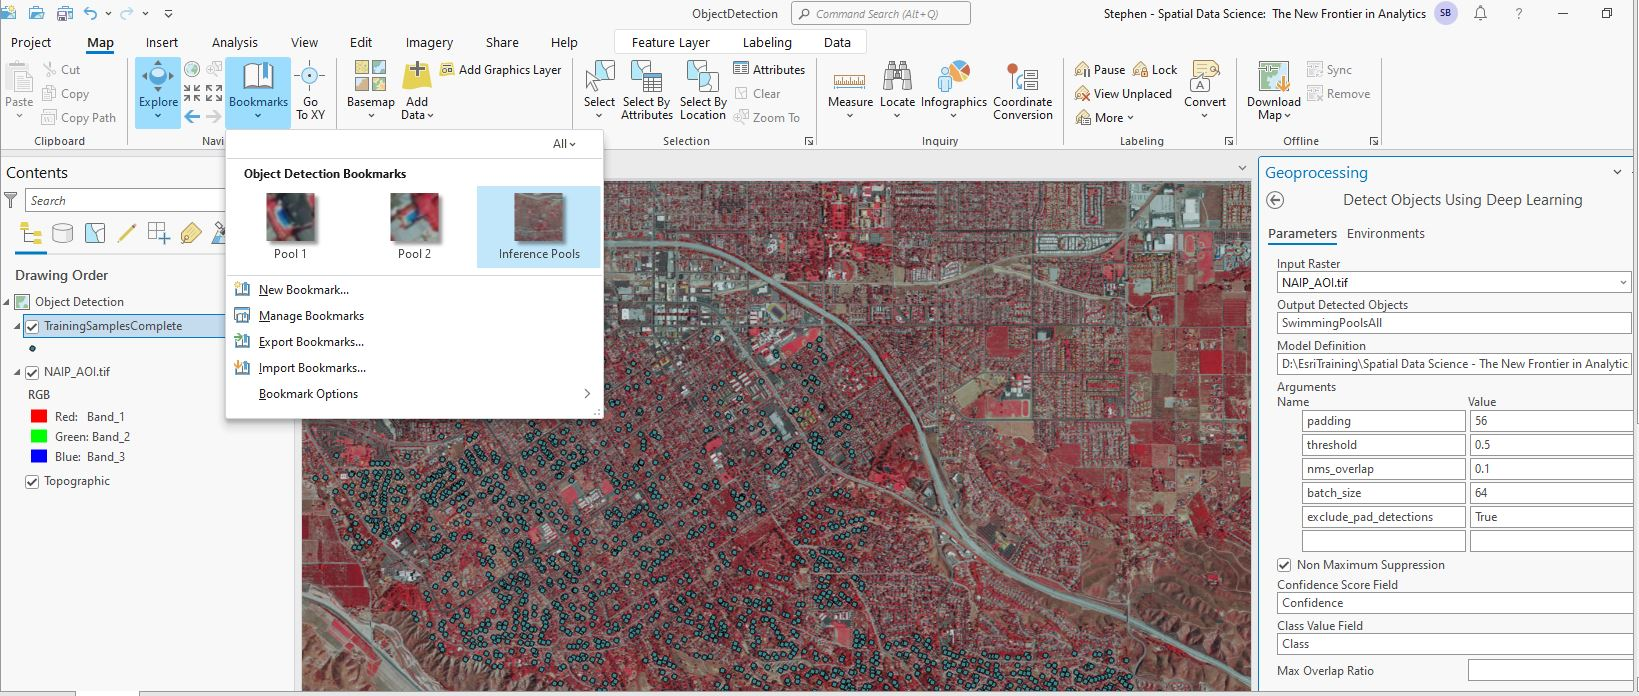

Inferencing can be a time-consuming process based on your computer's processing power and the scale of your analysis. To minimize processing time, you will analyze a smaller area of interest.

6. At the top of the Geoprocessing pane, click the Environments tab.

7. Under Processing Extent, update Extent to Current Display Extent.

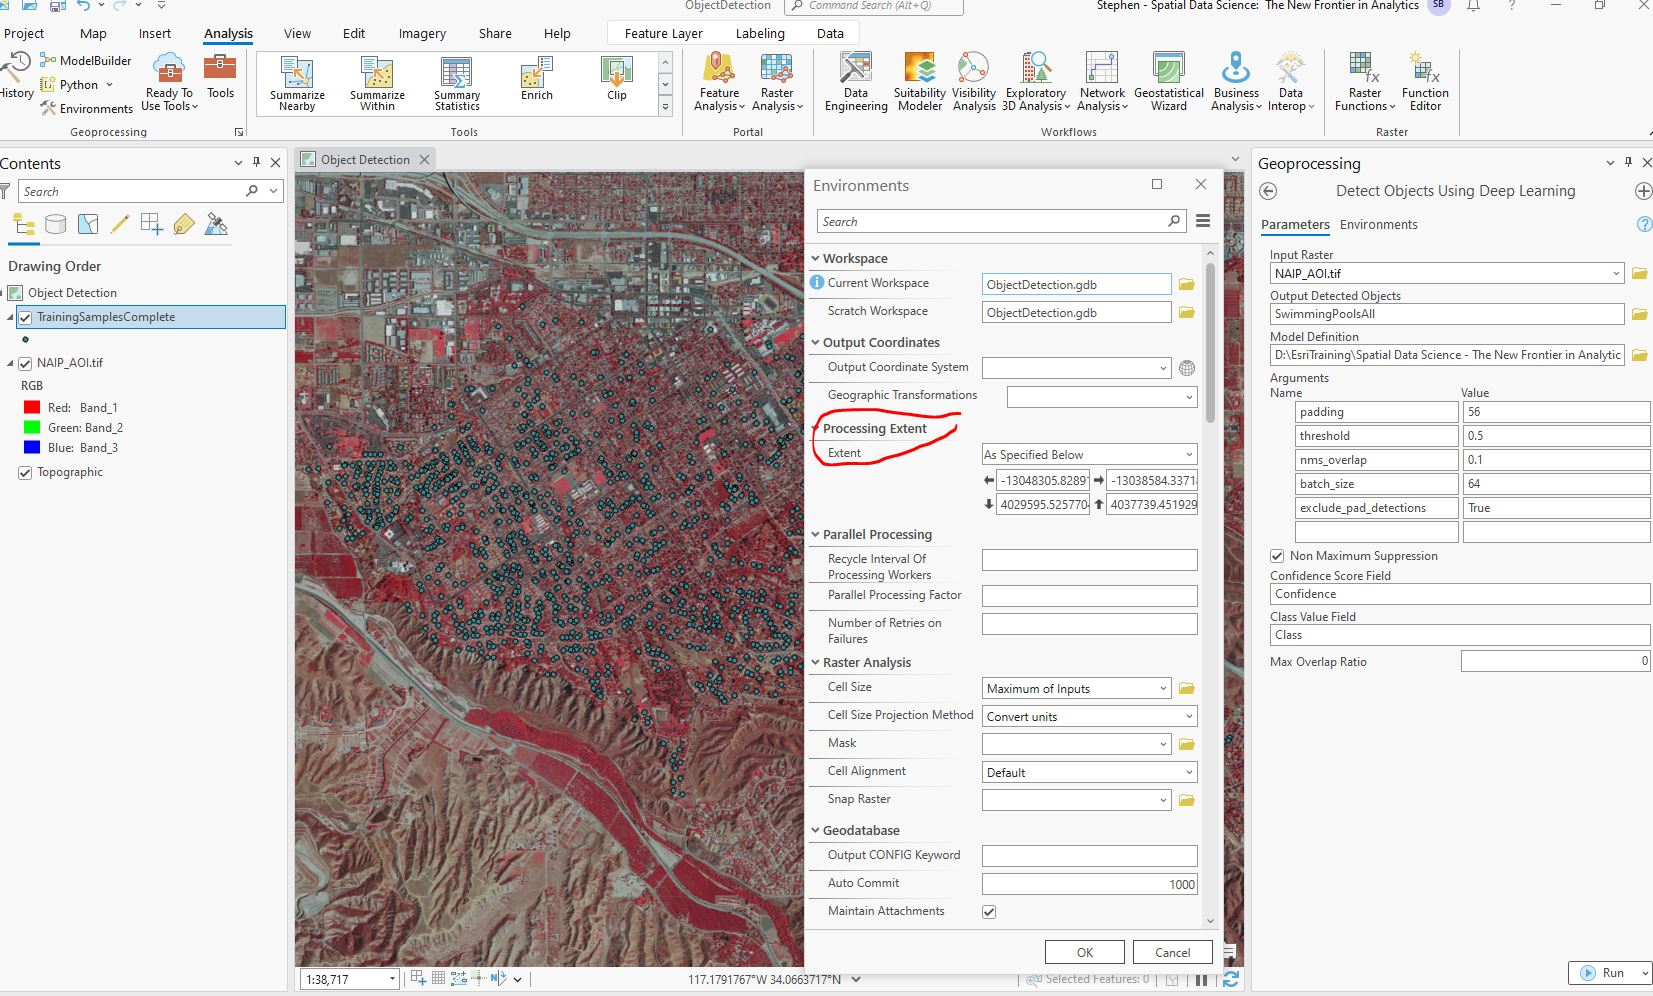

Coordinates are defined based on the current extent of the map. These coordinates will be used as the processing extent for this tool.



8. Click Run.

>Note: It may take several minutes for the tool to finish running.

The model detected swimming pools for the specified area and created a new feature layer with the results.



### **Review inferencing results**

The swimming pools that the model detected cannot be seen at the current scale. In this step, you will zoom in to the map to review the inferencing results and assess their accuracy.

1. In the Contents pane, click the SwimmingPoolsAll symbol.

2. In the Symbology pane, click the Gallery tab.

3. Under ArcGIS 2D, click Black Outline (2 Pts).

4. From the Map tab, in the Selection group, click Attributes.

The Attributes pane opens and provides attribute information for features in a selected area. You can also use this pane to zoom to each of the features and determine whether the model detected the appropriate object.

5. In the Attributes pane, click the Layers tab.

6. From the Choose A Layer drop-down list, choose SwimmingPoolsAll.

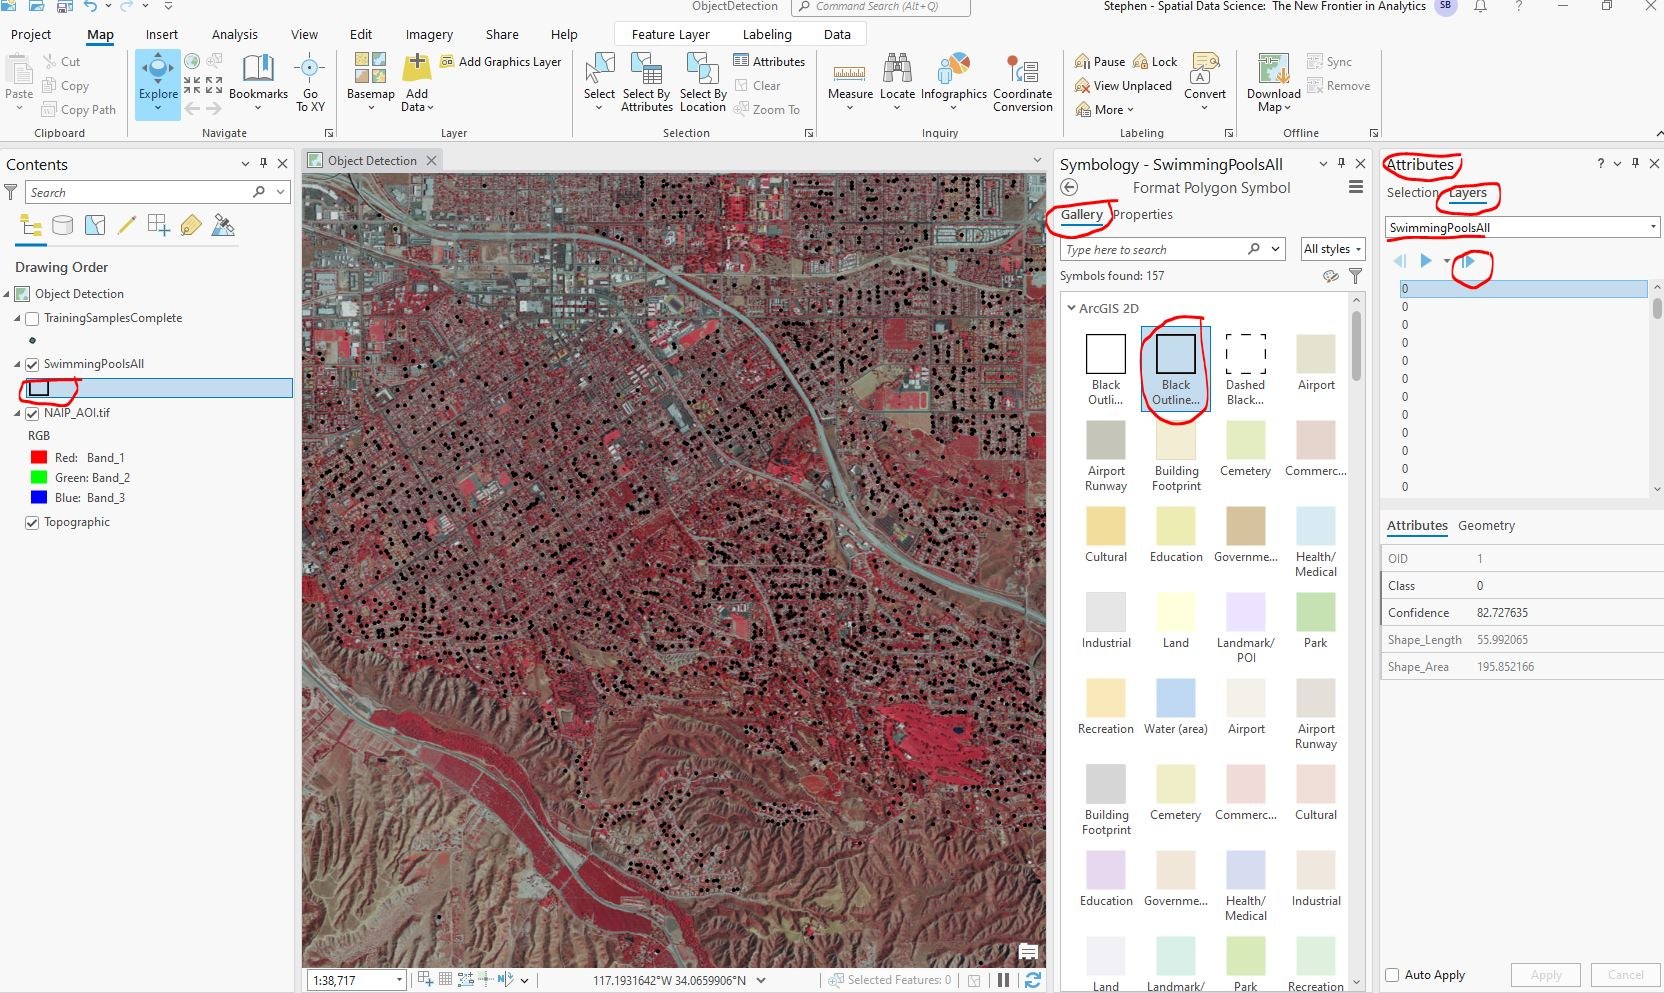

7. Under SwimmingPoolsAll, click the Step Forward button .

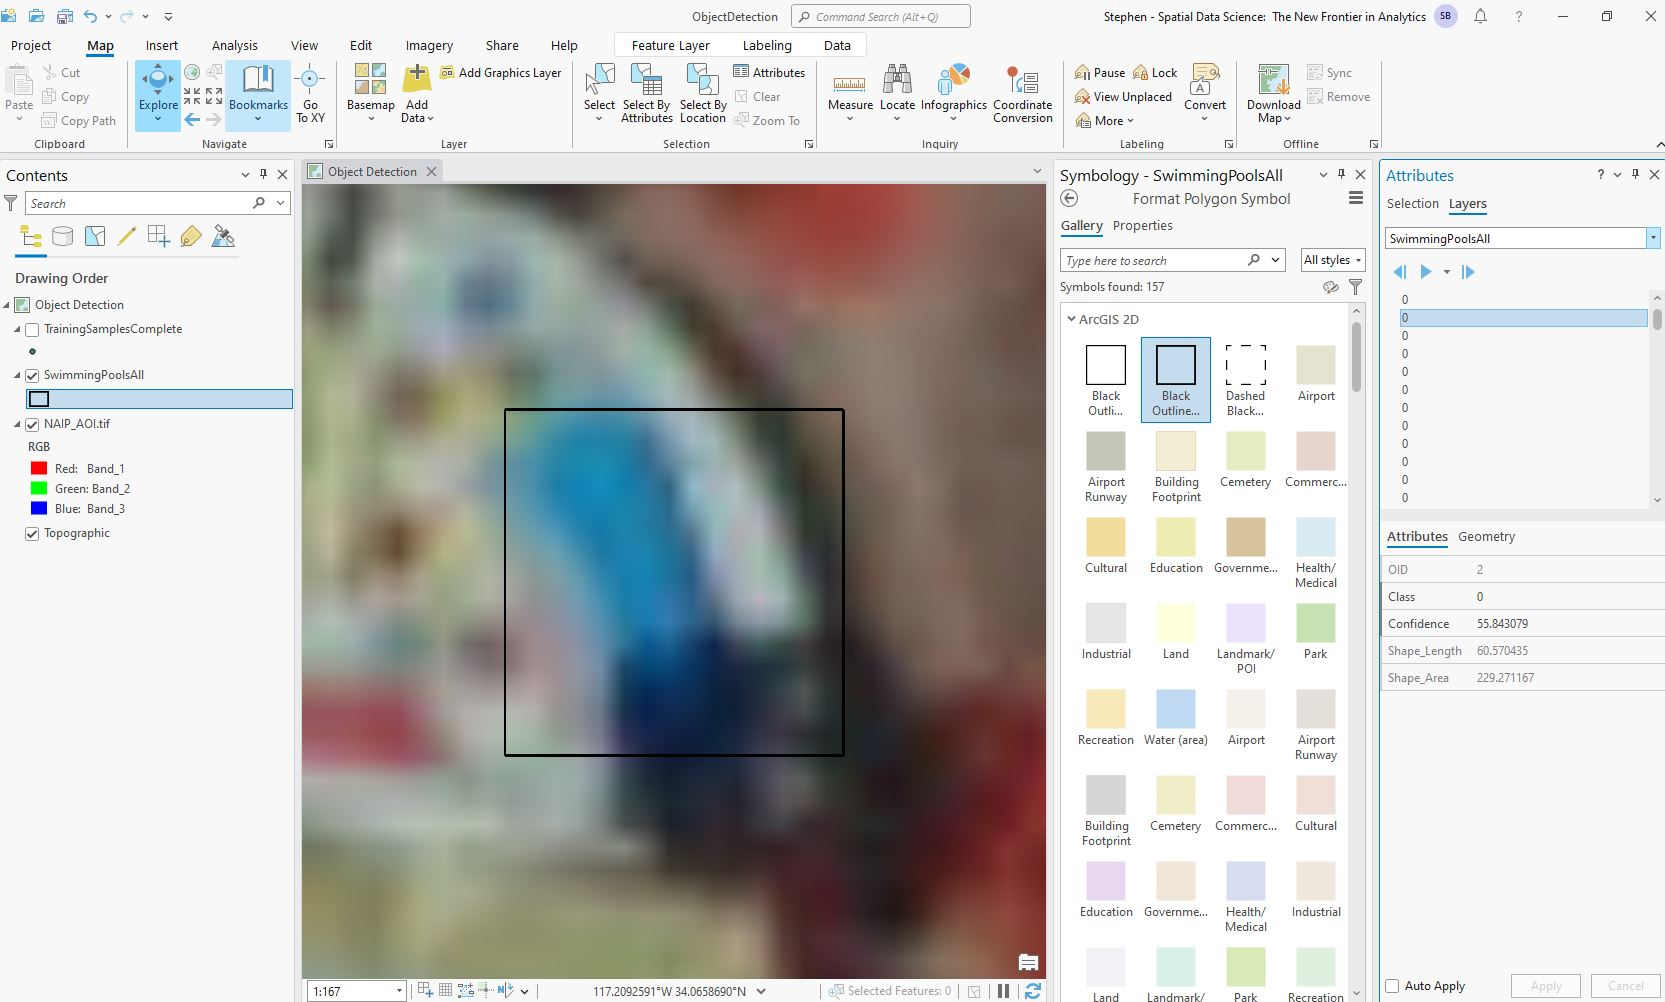

The map moves to a detected pool in the SwimmingPoolsAll layer. You can use this tool to review the detected pools, visually assessing the accuracy of the model results. Based on the accuracy of the model results, you would modify the model or continue running inferencing on the entire study area.

Using this model, you can quickly detect the remaining swimming pools in Southern California, providing tax assessors with the information that they need to identify more accurate property values and taxes.

8. Save the project.

9. If you would like to train the model using ArcGIS API for Python, proceed to the optional stretch goal; otherwise, save your project and exit ArcGIS Pro.

### **Stretch goal(Optional)**

Previously, you trained the model by using the Train Deep Learning Model geoprocessing tool. In this stretch goal, you will train the model by using ArcGIS API for Python in a Jupyter Notebook.

The contents of the notebook that you will run describe the process of training a deep learning model with ArcGIS API for Python. It includes the ArcGIS API code and descriptions of each step in the process.

> Note: If you run the ssd.fit() cell, it will begin to train the model. It can take up to four hours to train this model, depending on your computer's processing power. Other cells in the notebook may take a few minutes to run as well.

1. Use the following high-level steps to complete the stretch goal.

- From the Windows taskbar, search for and open Python Command Prompt.
- In the Python Command Prompt window, type cd, add a space, and then add the file path where you saved the ObjectDetection project. (The code with the file path may look like the following: cd C:\EsriTraining\ObjectDetection.)
- Press Enter.
- In the Python Command Prompt window, type `jupyter-notebook` and press Enter.
- In the web browser that opens, from the Files tab, click `model_training.ipynb`.
- Click Run Run button to run through each cell in the script.

2. When you are finished, close the web browser and the Python Command Prompt window.

3. Save your project and exit ArcGIS Pro.